In [1]:
from utils.io import read_events

In [ ]:
actions = read_events()

## Enriquecer os dados de eventos com mais tipos de eventos

In [3]:
import pandas as pd


def map_event_to_vaep_action(row):
    event_type = row['event_type'] if not pd.isna(row['event_type']) else "NA"
    pass_type = row['pass_type']if not pd.isna(row['pass_type']) else "NA"
    set_piece_type = row['set_piece_type'] if not pd.isna(row['set_piece_type']) else "NA"
    duel_type = row['duel_type'] if not pd.isna(row['duel_type']) else "NA"

    # --------- Passes e jogadas de bola parada -----------
    if event_type == 'PASS':
        if pass_type == 'CROSS':
            return 'cross'
        elif set_piece_type == 'CORNER_KICK':
            if pass_type == 'CROSS':
                return 'crossed_corner'
            else:
                return 'short_corner'
        elif set_piece_type == 'FREE_KICK':
            if pass_type == 'CROSS':
                return 'crossed_freekick'
            else:
                return 'short_freekick'
        elif set_piece_type == 'THROW_IN':
            return 'throw_in'
        else:
            return 'pass'

    # --------- Carregada (Carry / Dribble) -----------
    elif event_type == 'CARRY':
        return 'dribble'

    # --------- Take On -----------
    elif event_type == 'TAKE_ON':
        return 'take_on'

    # --------- Faltas -----------
    elif event_type == 'FOUL_COMMITTED':
        return 'foul'

    # --------- Duels (Tackle, Bad touch, Interception) -----------
    elif event_type == 'DUEL':
        if duel_type in ['SLIDING_TACKLE', 'GROUND']:
            return 'tackle'
        elif duel_type == 'LOOSE_BALL':
            return 'interception'
        elif duel_type == 'AERIAL':
            return 'tackle'  # ou outro, dependendo de como você quiser tratar

    # --------- Limpeza (Clearance) -----------
    elif event_type == 'CLEARANCE':
        return 'clearance'

    # --------- Finalizações -----------
    elif event_type == 'SHOT':
        if set_piece_type == 'PENALTY':
            return 'penalty_shot'
        elif set_piece_type == 'FREE_KICK':
            return 'freekick_shot'
        else:
            return 'shot'

    # --------- Goleiro -----------
    elif event_type == 'GOALKEEPER':
        # Aqui você pode ter campos adicionais para distinguir tipos de ações de goleiro
        # Exemplo genérico:
        return 'keeper_save'

    # --------- Outros -----------
    else:
        return 'non_action'  # Ou outro rótulo para eventos que você vai ignorar


In [ ]:
actions = actions.copy()

In [126]:
actions["action_type"] = actions.apply((lambda x: map_event_to_vaep_action(x).upper()), axis=1)

In [129]:
actions

,event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,...,success,duel_type,goalkeeper_type,card_type,match_id,player_jersey_num,player_position_group_type,receiver_jersey_num,receiver_position_group_type,action_type
0,12926009,PASS,1,00:02:33.887000,None,alive,5,5,15620,0.503105,...,<NA>,<NA>,<NA>,<NA>,13335,17.0,LW,5.0,LCB,PASS
1,12926647,PASS,1,00:02:36.623000,None,alive,5,5,4696,0.329743,...,<NA>,<NA>,<NA>,<NA>,13335,5.0,LCB,28.0,RCB,PASS
2,12926642,DUEL,1,00:02:39.860000,None,alive,11,5,14278,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,28.0,RCB,NaN,NaN,TACKLE
3,12926642,DUEL,1,00:02:39.860000,None,alive,11,11,284,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,6.0,LCB,NaN,NaN,TACKLE
4,12926642,DUEL,1,00:02:39.860000,None,alive,11,5,13068,0.760200,...,<NA>,AERIAL,<NA>,<NA>,13335,30.0,RW,NaN,NaN,TACKLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591723,18703655,DUEL,2,01:47:10.097000,None,alive,218,218,567,0.298400,...,<NA>,AERIAL,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,TACKLE
591724,18703656,PASS,2,01:47:10.130000,None,alive,218,218,567,0.296752,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,PASS
591725,18703661,CARRY,2,01:47:13.100000,01:47:14.101000,alive,218,218,7252,0.280362,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,DRIBBLE
591726,18703665,PASS,2,01:47:14.101000,None,alive,218,218,7252,0.305095,...,<NA>,<NA>,<NA>,<NA>,20480,NaN,NaN,NaN,NaN,PASS


In [ ]:
actions = pd.DataFrame({
    "team_id": actions["team_id"],
    "action_type": actions["action_type"],
    'start_x': actions['coordinates_x'] * 105 - 105/2,
    'start_y': actions['coordinates_y'] * 68 - 68/2,
    'end_x': actions['end_coordinates_x'].fillna(actions['coordinates_x']) * 105 - 105/2,
    'end_y': actions['end_coordinates_y'].fillna(actions['coordinates_y']) * 68 - 68/2,
})

In [7]:
actions[actions["action_type"] == "CROSS"]

,team_id,action_type,start_x,start_y,end_x,end_y
56,11,CROSS,-43.205,-27.236,-46.140,11.708
116,5,CROSS,25.294,-24.967,46.166,14.715
156,11,CROSS,-36.659,26.102,-41.995,4.524
159,11,CROSS,-40.355,20.863,-47.882,-7.707
485,11,CROSS,-26.959,-20.383,-44.516,-1.005
...,...,...,...,...,...,...
591446,1,CROSS,44.800,-1.271,44.800,-1.271
591545,218,CROSS,-18.726,-21.899,-39.017,1.379
591562,218,CROSS,-47.981,-25.058,-44.849,4.161
591711,218,CROSS,-14.016,18.176,-50.994,-11.804


In [8]:
actions['next_team_id'] = actions['team_id'].shift(-1)

actions['cross_success'] = ((actions['action_type'] == 'CROSS') & (actions['team_id'] == actions['next_team_id'])).fillna(False).astype(int)


actions.drop(columns=['next_team_id'], inplace=True)

actions[actions["action_type"]=="CROSS"].head()

,team_id,action_type,start_x,start_y,end_x,end_y,cross_success
56,11,CROSS,-43.205,-27.236,-46.140,11.708,1
116,5,CROSS,25.294,-24.967,46.166,14.715,1
156,11,CROSS,-36.659,26.102,-41.995,4.524,0
159,11,CROSS,-40.355,20.863,-47.882,-7.707,1
485,11,CROSS,-26.959,-20.383,-44.516,-1.005,0


In [9]:
def generate_cross_gamestates(df):
    # Cria as colunas lag para ações e posições
    df['action'] = df['action_type']
    df['action_1'] = df['action_type'].shift(1)
    df['action_2'] = df['action_type'].shift(2)

    df['start_x'] = df['start_x']
    df['start_x_1'] = df['start_x'].shift(1)
    df['start_x_2'] = df['start_x'].shift(2)

    df['start_y'] = df['start_y']
    df['start_y_1'] = df['start_y'].shift(1)
    df['start_y_2'] = df['start_y'].shift(2)

    df['end_x'] = df['end_x']
    df['end_x_1'] = df['end_x'].shift(1)
    df['end_x_2'] = df['end_x'].shift(2)

    df['end_y'] = df['end_y']
    df['end_y_1'] = df['end_y'].shift(1)
    df['end_y_2'] = df['end_y'].shift(2)

    # Filtrar apenas os cruzamentos
    gamestates = df[df['action_type'] == 'CROSS'][[
        'action_2', 'start_x_2', 'start_y_2', 'end_x_2', 'end_y_2',
        'action_1', 'start_x_1', 'start_y_1', 'end_x_1', 'end_y_1',
        'action', 'start_x', 'start_y', 'end_x', 'end_y', 'cross_success'
    ]].dropna().reset_index(drop=True)

    return gamestates


In [10]:
gamestates = generate_cross_gamestates(actions)
gamestates.head()

,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,start_y_1,end_x_1,end_y_1,action,start_x,start_y,end_x,end_y,cross_success
0,PASS,-45.632,-17.009,-29.518,-19.635,PASS,-29.518,-19.635,-43.205,-27.236,CROSS,-43.205,-27.236,-46.140,11.708,1
1,PASS,-11.829,23.639,-18.517,28.793,PASS,-27.271,24.053,-34.653,28.309,CROSS,-36.659,26.102,-41.995,4.524,0
2,CLEARANCE,-41.995,4.524,-41.995,4.524,PASS,-28.903,10.279,-34.911,22.386,CROSS,-40.355,20.863,-47.882,-7.707,1
3,PASS,-0.881,9.703,-20.149,-26.862,PASS,-41.160,-20.962,-26.277,-20.042,CROSS,-26.959,-20.383,-44.516,-1.005,0
4,PASS,-16.764,6.065,-20.489,11.723,PASS,-21.453,12.505,-26.877,22.263,CROSS,-29.764,21.492,-40.519,-1.271,0


In [11]:
def standardize_cross_directions_top_down(df):
    # Se o cruzamento start_x atual for > 0, espelha todas as coordenadas no eixo X
    mask_flip = df['start_x'] < 0

    for i in ['2', '1', '']:
        sx = f'start_x_{i}' if i else 'start_x'
        ex = f'end_x_{i}' if i else 'end_x'
        df.loc[mask_flip, sx] = -df.loc[mask_flip, sx]
        df.loc[mask_flip, ex] = -df.loc[mask_flip, ex]

    # Padroniza eixo Y (de cima para baixo)
    mask_flip_y = df['start_y'] < 0
    for i in ['2', '1', '']:
        sy = f'start_y_{i}' if i else 'start_y'
        ey = f'end_y_{i}' if i else 'end_y'
        df.loc[mask_flip_y, sy] = -df.loc[mask_flip_y, sy]
        df.loc[mask_flip_y, ey] = -df.loc[mask_flip_y, ey]

    return df

In [12]:
gamestates = standardize_cross_directions_top_down(gamestates)
gamestates.head()

,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,start_y_1,end_x_1,end_y_1,action,start_x,start_y,end_x,end_y,cross_success
0,PASS,45.632,17.009,29.518,19.635,PASS,29.518,19.635,43.205,27.236,CROSS,43.205,27.236,46.140,-11.708,1
1,PASS,11.829,23.639,18.517,28.793,PASS,27.271,24.053,34.653,28.309,CROSS,36.659,26.102,41.995,4.524,0
2,CLEARANCE,41.995,4.524,41.995,4.524,PASS,28.903,10.279,34.911,22.386,CROSS,40.355,20.863,47.882,-7.707,1
3,PASS,0.881,-9.703,20.149,26.862,PASS,41.160,20.962,26.277,20.042,CROSS,26.959,20.383,44.516,1.005,0
4,PASS,16.764,6.065,20.489,11.723,PASS,21.453,12.505,26.877,22.263,CROSS,29.764,21.492,40.519,-1.271,0


In [209]:
X = gamestates.drop(columns=['action', 'cross_success'])
y = gamestates['cross_success']


In [210]:
def manual_one_hot_encode_actions(df, action_cols=['action_1', 'action_2']):
    df = df.copy()
    new_cols = []

    for col in action_cols:
        categories = df[col].dropna().unique()

        for cat in categories:
            col_name = f'{col}_{cat}'
            df[col_name] = (df[col] == cat).astype(int)
            new_cols.append(col_name)

    # Agora dropa todas as colunas originais de ação de uma vez
    df = df.drop(columns=action_cols).reset_index(drop=True)

    return df


In [211]:
X = manual_one_hot_encode_action(X)
X.head()

,start_x_2,start_y_2,end_x_2,end_y_2,start_x_1,start_y_1,end_x_1,end_y_1,start_x,start_y,...,action_2_DRIBBLE,action_2_TAKE_ON,action_2_KEEPER_SAVE,action_2_CROSS,action_2_THROW_IN,action_2_PENALTY_SHOT,action_2_NON_ACTION,action_2_FOUL,action_2_INTERCEPTION,action_2_FREEKICK_SHOT
0,45.632,17.009,29.518,19.635,29.518,19.635,43.205,27.236,43.205,27.236,...,0,0,0,0,0,0,0,0,0,0
1,11.829,23.639,18.517,28.793,27.271,24.053,34.653,28.309,36.659,26.102,...,0,0,0,0,0,0,0,0,0,0
2,41.995,4.524,41.995,4.524,28.903,10.279,34.911,22.386,40.355,20.863,...,0,0,0,0,0,0,0,0,0,0
3,0.881,-9.703,20.149,26.862,41.160,20.962,26.277,20.042,26.959,20.383,...,0,0,0,0,0,0,0,0,0,0
4,16.764,6.065,20.489,11.723,21.453,12.505,26.877,22.263,29.764,21.492,...,0,0,0,0,0,0,0,0,0,0


In [205]:
X.dtypes

start_x_2                 float64
start_y_2                 float64
end_x_2                   float64
end_y_2                   float64
start_x_1                 float64
                           ...   
action_2_PENALTY_SHOT       int64
action_2_NON_ACTION         int64
action_2_FOUL               int64
action_2_INTERCEPTION       int64
action_2_FREEKICK_SHOT      int64
Length: 72, dtype: object

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [195]:
X_train

,start_x_2,start_y_2,end_x_2,end_y_2,start_x_1,start_y_1,end_x_1,end_y_1,start_x,start_y,...,action_2_DRIBBLE,action_2_TAKE_ON,action_2_KEEPER_SAVE,action_2_CROSS,action_2_THROW_IN,action_2_PENALTY_SHOT,action_2_NON_ACTION,action_2_FOUL,action_2_INTERCEPTION,action_2_FREEKICK_SHOT
5849,49.278,18.955,49.278,18.955,51.398,21.867,51.398,21.867,48.584,24.690,...,0,0,0,0,0,0,0,0,0,0
168,13.706,4.202,23.426,15.140,23.967,16.801,32.182,26.025,41.241,23.729,...,0,0,0,0,0,0,0,0,0,0
8953,13.951,-2.098,22.180,5.711,23.789,9.604,35.084,19.777,35.084,19.777,...,0,0,0,0,0,0,0,0,0,0
7481,53.666,33.484,45.162,31.379,43.459,29.926,29.291,19.277,28.922,17.636,...,0,0,0,0,0,0,0,0,0,0
9521,-17.208,-2.057,-20.738,2.985,-1.562,12.678,-1.562,12.678,21.337,19.974,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.100,29.945,4.477,19.078,4.588,16.868,41.855,20.829,41.855,20.829,...,0,0,0,0,0,0,0,0,0,0
5191,24.629,1.757,19.066,14.830,20.839,16.071,32.452,22.245,35.738,22.084,...,0,0,0,0,0,0,0,0,0,0
5390,2.288,27.332,15.529,30.579,30.692,25.063,45.094,23.748,45.094,23.748,...,0,0,0,0,0,0,0,0,0,0
860,-8.269,26.073,8.736,22.029,11.411,21.619,39.259,18.848,39.259,18.848,...,0,0,0,0,0,0,0,0,0,0


In [196]:
X_train.dtypes


start_x_2                 float64
start_y_2                 float64
end_x_2                   float64
end_y_2                   float64
start_x_1                 float64
                           ...   
action_2_PENALTY_SHOT       int64
action_2_NON_ACTION         int64
action_2_FOUL               int64
action_2_INTERCEPTION       int64
action_2_FREEKICK_SHOT      int64
Length: 72, dtype: object

In [214]:
import xgboost as xgb

model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train.values, y_train.values)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [216]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test.values)

print(classification_report(y_test.values, y_pred))
# print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1525
           1       0.48      0.28      0.36       474

    accuracy                           0.76      1999
   macro avg       0.64      0.59      0.60      1999
weighted avg       0.73      0.76      0.73      1999



In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Cria o modelo
clf = DecisionTreeClassifier(max_depth=8, random_state=42)  # Limite a profundidade para ter regras curtas
clf.fit(X_train, y_train)

# Exporta as regras em formato texto
rules_text = export_text(clf, feature_names=list(X_train.columns))
print(rules_text)


|--- end_y <= -6.12
|   |--- end_y <= -9.44
|   |   |--- start_y <= 29.84
|   |   |   |--- end_x <= 52.70
|   |   |   |   |--- end_y_1 <= 31.15
|   |   |   |   |   |--- end_x_1 <= 50.98
|   |   |   |   |   |   |--- start_x_1 <= 47.50
|   |   |   |   |   |   |   |--- end_x_2 <= 41.14
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- end_x_2 >  41.14
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- start_x_1 >  47.50
|   |   |   |   |   |   |   |--- end_x <= 48.43
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- end_x >  48.43
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- end_x_1 >  50.98
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- end_y_1 >  31.15
|   |   |   |   |   |--- action_2_DRIBBLE <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- action_2_DRIBBLE >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- end_x >  52.70
|   |   |   

In [13]:
from utils.io import read_tracking

tracking = read_tracking(13335)

In [14]:
from utils.tracking import calculate_smoothed_velocity


tracking = calculate_smoothed_velocity(tracking)

In [15]:
tracking.head()

,match_id,period,period_game_clock,frame_num,game_event_id,possession_event_id,element,jersey_number,x,y,team_id,vx,vy
0,13335.0,1.0,0.000221,4612.0,12931923.0,12926009.0,home,1.0,-38.123,-0.452,5.0,0.566667,-0.091667
1,NaN,1.0,0.033587,4613.0,NaN,NaN,home,1.0,-38.100,-0.457,5.0,0.562500,-0.087500
2,NaN,1.0,0.066954,4614.0,NaN,NaN,home,1.0,-38.078,-0.461,5.0,0.560000,-0.080000
3,NaN,1.0,0.100321,4615.0,NaN,NaN,home,1.0,-38.055,-0.463,5.0,0.558333,-0.070833
4,NaN,1.0,0.133687,4616.0,NaN,NaN,home,1.0,-38.033,-0.466,5.0,0.557143,-0.064286


In [ ]:
cross_events = actions[actions["pass_type"] == "CROSS"]

In [26]:
cross_events[cross_events["match_id"] == 13335]["event_id"]

56      12926871
116     12927328
156     12927878
159     12927949
485     12932318
505     12932553
570     12933975
582     12934107
940     12939302
946     37925711
952     12939733
962     12939827
978     12940108
1107    12942056
1188    12943456
1196    12943562
1257    12944287
1269    12944653
1344    12945644
1354    12945794
1390    12946314
1392    12946340
1483    12947230
1514    12947559
Name: event_id, dtype: Int64

In [27]:
cross_tracking = tracking[tracking["possession_event_id"].isin(cross_events["event_id"].tolist())].sort_values(by=["possession_event_id", "element"])
cross_tracking["possession_event_id"].unique()

array([12926871., 12927328., 12927878., 12927949., 12932318., 12932553.,
       12933975., 12934107., 12939302., 12939733., 12939827., 12940108.,
       12942056., 12943456., 12943562., 12944287., 12944653., 12945644.,
       12945794., 12946314., 12946340., 12947230., 12947559.])

In [38]:
import importlib
import utils.tracking
importlib.reload(utils.tracking)
from utils.tracking import standardize_crossings_direction



cross_tracking = standardize_crossings_direction(cross_tracking, cross_events)

In [ ]:

df =  actions[actions["event_id"] == 12926871].iloc[0]

coords = pd.DataFrame({
    'event_id': df['event_id'],
    'start_x': df['coordinates_x'] * 105 - 105/2,
    'start_y': df['coordinates_y'] * 68 - 68/2,
    'end_x': df['end_coordinates_x'] * 105 - 105/2,
    'end_y': df['end_coordinates_y'] * 68 - 68/2,
}, index=['event_id'])

mask_flip = coords['start_x'] < 0

coords.loc[mask_flip, 'start_x'] = -coords.loc[mask_flip, 'start_x']
coords.loc[mask_flip, 'end_x'] = -coords.loc[mask_flip, 'end_x']

mask_flip = coords['start_y'] < 0

coords.loc[mask_flip, 'start_y'] = -coords.loc[mask_flip, 'start_y']
coords.loc[mask_flip, 'end_y'] = -coords.loc[mask_flip, 'end_y']

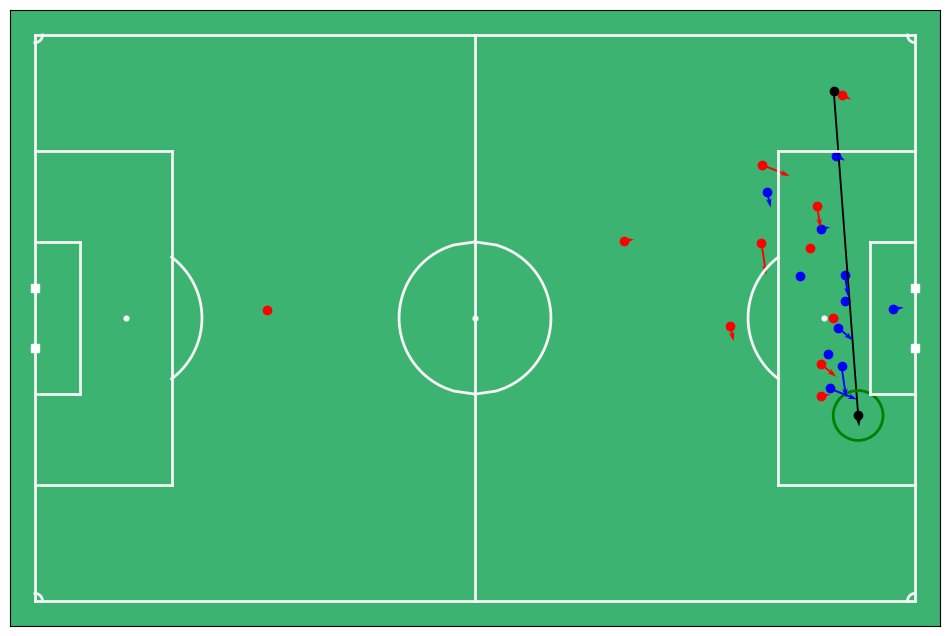

In [121]:
from matplotlib import pyplot as plt
from utils.plot import plot_pitch


fig, ax = plot_pitch()

frame = cross_tracking[cross_tracking["possession_event_id"] == 12926871]

home_team = frame[frame["element"] == "home"]
away_team = frame[frame["element"] == "away"]


ax.scatter(home_team["x"], home_team["y"], color="blue")
ax.scatter(away_team["x"], away_team["y"], color="red")

ax.scatter(coords["start_x"], coords["start_y"], color="black")
ax.scatter(coords["end_x"], coords["end_y"], color="black")

ax.quiver(
    coords["start_x"], coords["start_y"],
    coords["end_x"] - coords["start_x"], coords["end_y"] - coords["start_y"],
    color="black",
    scale=108,
    width=0.002,
    headwidth=3, headlength=5, headaxislength=4,
)

fig.gca().add_patch(plt.Circle((end_x, end_y), radius=3.0, color='green', fill=False, linewidth=2))

ax.quiver(
    home_team["x"], home_team["y"],
    away_team["vx"], away_team["vy"],
    color="blue",
    scale=50,
    width=0.002,
    headwidth=3, headlength=5, headaxislength=4,
)

ax.quiver(
    away_team["x"], away_team["y"],
    away_team["vx"],away_team["vy"],
    color="red",
    scale=50,
    width=0.002,
    headwidth=3, headlength=5, headaxislength=4,
)

In [87]:
import numpy as np

def estimate_time_to_target(start_x, start_y, end_x, end_y, ball_speed=18):
    distance = np.sqrt((end_x - start_x)**2 + (end_y - start_y)**2)
    time = distance / ball_speed
    return time

In [122]:
def project_towards_target(player_x, player_y, target_x, target_y, time_delta, player_speed=1):
    # Calcula o vetor direção
    dx = target_x - player_x
    dy = target_y - player_y
    distance_to_target = np.sqrt(dx**2 + dy**2)
    
    if distance_to_target == 0:
        return player_x, player_y  # Já está no destino

    # Calcula o deslocamento em x e y
    direction_x = dx / distance_to_target
    direction_y = dy / distance_to_target
    
    # Quanto o jogador consegue percorrer no tempo disponível
    distance_covered = min(player_speed * time_delta, distance_to_target)

    new_x = player_x + direction_x * distance_covered
    new_y = player_y + direction_y * distance_covered

    return new_x, new_y

In [89]:
def is_in_zone(player_x, player_y, target_x, target_y, radius=3):
    distance = np.sqrt((player_x - target_x)**2 + (player_y - target_y)**2)
    return distance <= radius

In [ ]:
num_attackers = 0
num_defenders = 0

event_id = coords.iloc[0]["event_id"]
start_x = coords.iloc[0]["start_x"]
start_y = coords.iloc[0]["start_y"]
end_x = coords.iloc[0]["end_x"]
end_y = coords.iloc[0]["end_y"]

time_to_target = estimate_time_to_target(start_x, start_y, end_x, end_y)

team_id = actions[actions["event_id"] == event_id].iloc[0]["team_id"]

for _, player in frame.iterrows():
    projected_x, projected_y = project_towards_target(
        player_x=player['x'],
        player_y=player['y'],
        target_x=end_x,
        target_y=end_y,
        time_delta=time_to_target,
    )
    
    if is_in_zone(projected_x, projected_y, end_x, end_y, radius=3):
        if player['team_id'] == team_id:
            num_attackers += 1
        else:
            num_defenders += 1

print(num_attackers)
print(num_defenders)


1
1


In [124]:
from utils.tracking import count_players_in_box


count_players_in_box(frame, team_id)

(5, 10)

In [ ]:
from tracking import read, process, features
from utils.io import read_events

import pandas as pd


def map_event_to_vaep_action(row):
    event_type = row['event_type'] if not pd.isna(row['event_type']) else "NA"
    pass_type = row['pass_type']if not pd.isna(row['pass_type']) else "NA"
    set_piece_type = row['set_piece_type'] if not pd.isna(row['set_piece_type']) else "NA"
    duel_type = row['duel_type'] if not pd.isna(row['duel_type']) else "NA"

    # --------- Passes e jogadas de bola parada -----------
    if event_type == 'PASS':
        if pass_type == 'CROSS':
            return 'cross'
        elif set_piece_type == 'CORNER_KICK':
            if pass_type == 'CROSS':
                return 'crossed_corner'
            else:
                return 'short_corner'
        elif set_piece_type == 'FREE_KICK':
            if pass_type == 'CROSS':
                return 'crossed_freekick'
            else:
                return 'short_freekick'
        elif set_piece_type == 'THROW_IN':
            return 'throw_in'
        else:
            return 'pass'

    # --------- Carregada (Carry / Dribble) -----------
    elif event_type == 'CARRY':
        return 'dribble'

    # --------- Take On -----------
    elif event_type == 'TAKE_ON':
        return 'take_on'

    # --------- Faltas -----------
    elif event_type == 'FOUL_COMMITTED':
        return 'foul'

    # --------- Duels (Tackle, Bad touch, Interception) -----------
    elif event_type == 'DUEL':
        if duel_type in ['SLIDING_TACKLE', 'GROUND']:
            return 'tackle'
        elif duel_type == 'LOOSE_BALL':
            return 'interception'
        elif duel_type == 'AERIAL':
            return 'tackle'  # ou outro, dependendo de como você quiser tratar

    # --------- Limpeza (Clearance) -----------
    elif event_type == 'CLEARANCE':
        return 'clearance'

    # --------- Finalizações -----------
    elif event_type == 'SHOT':
        if set_piece_type == 'PENALTY':
            return 'penalty_shot'
        elif set_piece_type == 'FREE_KICK':
            return 'freekick_shot'
        else:
            return 'shot'

    # --------- Goleiro -----------
    elif event_type == 'GOALKEEPER':
        # Aqui você pode ter campos adicionais para distinguir tipos de ações de goleiro
        # Exemplo genérico:
        return 'keeper_save'

    # --------- Outros -----------
    else:
        return 'non_action'  # Ou outro rótulo para eventos que você vai ignorar

actions = read_events()

actions = actions.copy()
actions["action_type"] = actions.apply((lambda x: map_event_to_vaep_action(x).upper()), axis=1)


match_id = 13335
tracking_df = read.read_by_match_id(match_id)

tracking_df = process.process(tracking_df, actions, match_id)


In [3]:
tracking_df.sort_values(by=["possession_event_id", "element"])

,match_id,period,period_game_clock,frame_num,game_event_id,possession_event_id,element,jersey_number,x,y,team_id,vx,vy
197869,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,away,2.0,17.952,9.310,11.0,0.546875,0.053125
701348,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,away,6.0,41.688,-5.535,11.0,0.809375,-0.690625
1012460,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,away,9.0,43.091,-0.023,11.0,0.356250,-0.050000
1451419,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,away,16.0,41.686,-9.393,11.0,0.493750,0.100000
1811417,NaN,1.0,181.481702,10051.0,12932919.0,12926871.0,away,17.0,44.228,26.828,11.0,0.471875,-0.271875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259247,NaN,2.0,5691.057801,185838.0,12953959.0,12947559.0,home,19.0,38.967,-1.780,5.0,0.459375,-1.365625
2638981,NaN,2.0,5691.057801,185838.0,12953959.0,12947559.0,home,22.0,41.110,1.319,5.0,1.006250,-0.409375
2855326,NaN,2.0,5691.057801,185838.0,12953959.0,12947559.0,home,24.0,35.878,-5.527,5.0,1.021875,0.340625
3353588,NaN,2.0,5691.057801,185838.0,12953959.0,12947559.0,home,28.0,40.352,-0.139,5.0,1.112500,0.228125


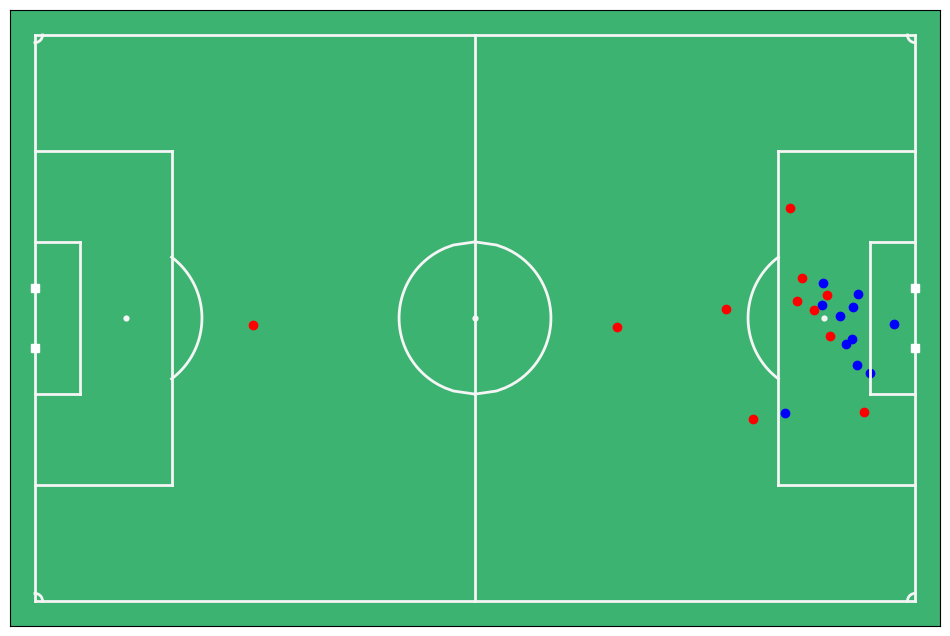

In [11]:
from matplotlib import pyplot as plt
from utils.plot import plot_pitch


fig, ax = plot_pitch()

ids = tracking_df["possession_event_id"].unique()
frame = tracking_df[tracking_df["possession_event_id"] == ids[11]]

home_team = frame[frame["element"] == "home"]
away_team = frame[frame["element"] == "away"]


ax.scatter(home_team["x"], home_team["y"], color="blue")
ax.scatter(away_team["x"], away_team["y"], color="red")

# ax.scatter(coords["start_x"], coords["start_y"], color="black")
# ax.scatter(coords["end_x"], coords["end_y"], color="black")

# ax.quiver(
#     coords["start_x"], coords["start_y"],
#     coords["end_x"] - coords["start_x"], coords["end_y"] - coords["start_y"],
#     color="black",
#     scale=108,
#     width=0.002,
#     headwidth=3, headlength=5, headaxislength=4,
# )

# fig.gca().add_patch(plt.Circle((end_x, end_y), radius=3.0, color='green', fill=False, linewidth=2))

# ax.quiver(
#     home_team["x"], home_team["y"],
#     away_team["vx"], away_team["vy"],
#     color="blue",
#     scale=50,
#     width=0.002,
#     headwidth=3, headlength=5, headaxislength=4,
# )

# ax.quiver(
#     away_team["x"], away_team["y"],
#     away_team["vx"],away_team["vy"],
#     color="red",
#     scale=50,
#     width=0.002,
#     headwidth=3, headlength=5, headaxislength=4,
# )

In [ ]:
import importlib
import utils.events
importlib.reload(utils.events)

import tracking.features
importlib.reload(tracking.features)
import tracking.process
import tracking.read
from utils.events import generate_gamestates, read_actions

actions = read_actions()


tracking_df = tracking.read.read_by_match_id(13335)
tracking_df = tracking.process.process(tracking_df, actions, 13335)

gamestates = generate_gamestates(actions)


ids = gamestates[gamestates["match_id"] == 13335]["event_id"].tolist()

for id in ids:
    frame = tracking_df[tracking_df["possession_event_id"] == id]

    event = gamestates[gamestates["event_id"] == id].iloc[0]
    home_team_id = event["team_id"]

    attackers, defenders = tracking.features.count_players_in_box(frame, home_team_id)

    gamestates.loc[gamestates["event_id"] == id, "attackers_in_box" ] = attackers
    gamestates.loc[gamestates["event_id"] == id, "defenders_in_box"] = defenders

for id in ids:
    frame = tracking_df[tracking_df["possession_event_id"] == id]

    event = gamestates[gamestates["event_id"] == id].iloc[0]

    attackers, defenders = tracking.features.count_players_in_zone(frame, event)

    gamestates.loc[gamestates["event_id"] == id, "attackers_in_zone" ] = attackers
    gamestates.loc[gamestates["event_id"] == id, "defenders_in_zone"] = defenders

gamestates.head()

AttributeError: module 'tracking.features' has no attribute 'count_players_in_zone'

In [23]:
gamestates.columns

Index(['match_id', 'event_id', 'team_id', 'action_2', 'start_x_2', 'start_y_2',
       'end_x_2', 'end_y_2', 'action_1', 'start_x_1', 'start_y_1', 'end_x_1',
       'end_y_1', 'action', 'start_x', 'start_y', 'end_x', 'end_y',
       'cross_success', 'attackers_in_box', 'defenders_in_box'],
      dtype='object')

In [6]:
import importlib
import utils.events
importlib.reload(utils.events)
from utils.events import read_actions, generate_gamestates


actions = read_actions() 
gamestates = generate_gamestates(actions)
gamestates.head()

,match_id,event_id,team_id,action_2,start_x_2,start_y_2,end_x_2,end_y_2,action_1,start_x_1,start_y_1,end_x_1,end_y_1,action,start_x,start_y,end_x,end_y,cross_success
0,13335,12926871,11,PASS,45.632,17.009,29.518,19.635,PASS,29.518,19.635,43.205,27.236,CROSS,43.205,27.236,46.140,-11.708,1
1,13335,12927878,11,PASS,11.829,23.639,18.517,28.793,PASS,27.271,24.053,34.653,28.309,CROSS,36.659,26.102,41.995,4.524,0
2,13335,12927949,11,CLEARANCE,41.995,4.524,41.995,4.524,PASS,28.903,10.279,34.911,22.386,CROSS,40.355,20.863,47.882,-7.707,1
3,13335,12932318,11,PASS,0.881,-9.703,20.149,26.862,PASS,41.160,20.962,26.277,20.042,CROSS,26.959,20.383,44.516,1.005,0
4,13335,12932553,11,PASS,16.764,6.065,20.489,11.723,PASS,21.453,12.505,26.877,22.263,CROSS,29.764,21.492,40.519,-1.271,0
